In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from flaml import AutoML
from lightgbm import LGBMClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [30]:
path = "sampled_file.csv"

In [31]:
df = pd.read_csv(path, delimiter=',',nrows=100000, low_memory=False)

In [32]:
df.head()

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_bss_code,piezo_measurement_date,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_producer_code,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name,meteo_id,meteo_name,meteo_latitude,meteo_longitude,meteo_altitude,meteo_date,meteo_rain_height,meteo_DRR,meteo_temperature_min,meteo_time_tn,meteo_temperature_max,meteo_time_tx,meteo_temperature_avg,meteo_temperature_avg_threshold,meteo_temperature_min_ground,meteo_temperature_min_50cm,meteo_frost_duration,meteo_amplitude_tn_tx,meteo_temperature_avg_tntm,meteo_pressure_avg,meteo_pression_maxi,meteo_wind_speed_avg_10m,meteo_wind_max,meteo_wind_direction_max_inst,meteo_time_wind_max,meteo_wind_avg,meteo_wind_direction_max_avg,meteo_time_wind_avg,meteo_wind_speed_avg_2m,meteo_wind_max_2m,meteo_wind_direction_max_inst_2m,meteo_time_wind_max_2m,meteo_wind_max_3s,meteo_time_wind_max_3s,meteo_humidity_min,meteo_time_humidity_min,meteo_humidity_max,meteo_time_humidity_max,meteo_humidity_duration_below_40%,meteo_humidity_duration_above_80%,meteo__pressure_saturation_avg,meteo_wetting_duration,meteo_humidity_avg,meteo_sunshine_duration,meteo_radiation,meteo_radiation_direct,meteo_sunshine_%,meteo_radiation_IR,meteo_radiation_UV_max,meteo_cloudiness,meteo_cloudiness_height,meteo_if_snow,meteo_if_fog,meteo_if_thunderstorm,meteo_if_sleet,meteo_if_hail,meteo_if_dew,meteo_if_black_ice,meteo_if_snow_ground,meteo_if_frost,meteo_if_smoke,meteo_if_mist,meteo_if_lightning,meteo_evapotranspiration_Monteith,meteo_evapotranspiration_grid,meteo_radiation_UV,meteo_snow_height,meteo_snow_thickness_max,meteo_snow_thickness_6h,distance_piezo_meteo,hydro_station_code,hydro_observation_date_elab,hydro_observation_result_elab,hydro_status_code,hydro_status_label,hydro_method_code,hydro_method_label,hydro_qualification_code,hydro_qualification_label,hydro_longitude,hydro_latitude,hydro_hydro_quantity_elab,distance_piezo_hydro,prelev_structure_code_0,prelev_volume_0,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_longitude_0,prelev_latitude_0,prelev_commune_code_insee_0,prelev_structure_code_1,prelev_volume_1,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_longitude_1,prelev_latitude_1,prelev_commune_code_insee_1,prelev_structure_code_2,prelev_volume_2,prelev_usage_label_2,prelev_volume_obtention_mode_label_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,999786,40,Fri Jun 28 07:31:38 CEST 2024,3.0,Landes,40017,CAPTAGE DE MARSEILLON P1,"['348AG20', '350AA01']",42.90,09782X0006/P1,Audignon,-0.604009,43.722392,BSS002FLZP,09782X0006/P1,2021-01-15,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,2.0,Point lié au point précédent,2.240000e+13,Conseil Général des Landes (22400001800016),0,Inconnue,40286001,SAMADET,-0.488833,43.640667,134,2021-01-15,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,12.975477,Q124001001,2021-01-15,38331.0,12,Donnée pré-validée,12,Interpolation,20,Bonne,-0.569240,43.766923,QmJ,5.685013,OPR0000598358,1.894877e+06,EAU POTABLE,Mesure directe,-0.809235,43.652873,40090.0,OPR0000256580,1.389803e+06,IRRIGATION,Mesure directe,-0.732115,43.875375,40066.0,OPR0000009827,882899.0,IRRIGATION,Mesure directe,-0.724721,43.760552,40309.0,3.127198e+07,68.6,390.0,23080,0,2,Average
1,3272462,66,Th

In [33]:
df.describe()

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_continuity_code,piezo_producer_code,meteo_id,meteo_latitude,meteo_longitude,meteo_altitude,meteo_rain_height,meteo_DRR,meteo_temperature_min,meteo_time_tn,meteo_temperature_max,meteo_time_tx,meteo_temperature_avg,meteo_temperature_avg_threshold,meteo_temperature_min_ground,meteo_temperature_min_50cm,meteo_frost_duration,meteo_amplitude_tn_tx,meteo_temperature_avg_tntm,meteo_pressure_avg,meteo_pression_maxi,meteo_wind_speed_avg_10m,meteo_wind_max,meteo_wind_direction_max_inst,meteo_time_wind_max,meteo_wind_avg,meteo_wind_direction_max_avg,meteo_time_wind_avg,meteo_wind_speed_avg_2m,meteo_wind_max_2m,meteo_wind_direction_max_inst_2m,meteo_time_wind_max_2m,meteo_wind_max_3s,meteo_time_wind_max_3s,meteo_humidity_min,meteo_time_humidity_min,meteo_humidity_max,meteo_time_humidity_max,meteo_humidity_duration_below_40%,meteo_humidity_duration_above_80%,meteo__pressure_saturation_avg,meteo_wetting_duration,meteo_humidity_avg,meteo_sunshine_duration,meteo_radiation,meteo_radiation_direct,meteo_sunshine_%,meteo_radiation_IR,meteo_radiation_UV_max,meteo_cloudiness,meteo_cloudiness_height,meteo_if_snow,meteo_if_fog,meteo_if_thunderstorm,meteo_if_sleet,meteo_if_hail,meteo_if_dew,meteo_if_black_ice,meteo_if_snow_ground,meteo_if_frost,meteo_if_smoke,meteo_if_mist,meteo_if_lightning,meteo_evapotranspiration_Monteith,meteo_evapotranspiration_grid,meteo_radiation_UV,meteo_snow_height,meteo_snow_thickness_max,meteo_snow_thickness_6h,distance_piezo_meteo,hydro_observation_result_elab,hydro_status_code,hydro_method_code,hydro_qualification_code,hydro_longitude,hydro_latitude,distance_piezo_hydro,prelev_volume_0,prelev_longitude_0,prelev_latitude_0,prelev_commune_code_insee_0,prelev_volume_1,prelev_longitude_1,prelev_latitude_1,prelev_commune_code_insee_1,prelev_volume_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_pop_commune
count,1.000000e+05,93685.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.493700e+04,1.000000e+05,100000.000000,100000.000000,100000.000000,99108.000000,11904.000000,91533.000000,87945.000000,91665.000000,87966.000000,88242.000000,91528.000000,26640.000000,15938.000000,83207.000000,91528.000000,91528.000000,14940.000000,14782.000000,45915.000000,45922.000000,45822.000000,45797.000000,45777.000000,45731.000000,45755.000000,4278.000000,4272.000000,4197.000000,4189.000000,42370.000000,42367.000000,50727.000000,50617.000000,50720.000000,50607.000000,50336.000000,50277.000000,50746.000000,270.000000,50739.000000,13022.000000,17345.000000,286.000000,13022.000000,1.0,219.000000,281.000000,281.000000,13629.000000,13373.000000,10465.000000,2542.000000,2527.000000,2581.000000,5762.000000,2601.000000,8202.000000,12764.000000,13020.000000,2544.000000,17295.000000,88438.000000,219.000000,6116.000000,16171.000000,15935.000000,100000.000000,1.000000e+05,100000.000000,100000.0,100000.00000,100000.000000,100000.000000,100000.000000,8.057100e+04,80571.000000,80571.000000,80571.000000,8.054700e+04,80547.000000,80547.000000,80547.000000,8.046300e+04,80463.000000,80463.000000,80463.000000,8.656000e+04,99073.000000
mean,1.557671e+06,86.552746,147.537420,2.217127,46.418512,1.999140,5.580579e+12,3.755251e+07,2.193412,46.424104,166.173700,2.072597,100.449765,7.267436,750.287623,16.906716,1335.701248,11.711641,12.086061,5.480349,6.373918,60.123235,9.636068,12.109939,1018.222316,1015.402625,3.253730,10.900897,198.556807,1260.481473,6.546993,199.044193,1249.895902,1.717952,7.409410,195.732666,1413.031750,10.113373,1264.489131,54.590179,1317.980580,93.106112,827.062343,72.937222,748.945442,10.959211,321.111111,76.269162,332.223698,1261.829865,1125.111888,45.333589,2667.0,3.707763,7.064057,94.341637,0.032284,0.176924,0.065647,0.006688,0.015038,0.110035,0.050850,0.010381,0.025969,0.000078,0.270661,0.044418,2.436820,2.361787,1.317210,0.054611,0.452167,0.432193,13.885885,1.13

In [34]:
threshold = 0.6 # min syndical acceptable


non_nan_percentage = df.notna().mean()

# Drop columns where non-NaN percentage is less than 60%
df_filtered = df.loc[:, non_nan_percentage >= threshold]

In [35]:
df_filtered['piezo_groundwater_level_category'].unique()

array(['Average', 'Very Low', 'High', 'Low', 'Very High'], dtype=object)

<Axes: xlabel='piezo_groundwater_level_category', ylabel='Count'>

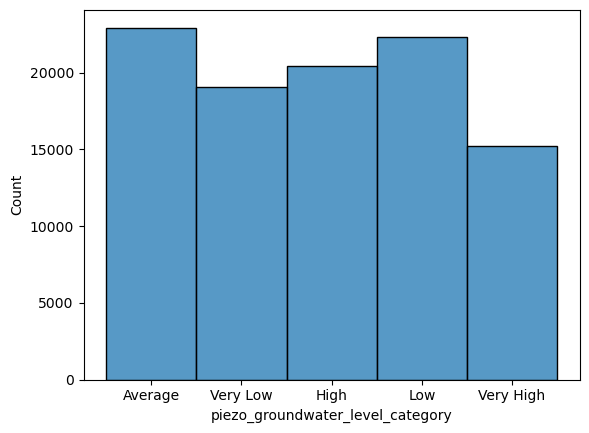

In [36]:
sns.histplot(data=df_filtered, x='piezo_groundwater_level_category')

In [37]:
df_categorical = df_filtered.select_dtypes(include=['object','category'])

In [38]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
df_categorical.head()

,piezo_station_department_code,piezo_station_update_date,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_bss_code,piezo_station_commune_name,piezo_station_bss_id,piezo_bss_code,piezo_measurement_date,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_name,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name,meteo_name,meteo_date,hydro_station_code,hydro_observation_date_elab,hydro_status_label,hydro_method_label,hydro_qualification_label,hydro_hydro_quantity_elab,prelev_structure_code_0,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_structure_code_1,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_structure_code_2,prelev_usage_label_2,prelev_volume_obtention_mode_label_2,insee_%_agri,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,40,Fri Jun 28 07:31:38 CEST 2024,Landes,40017,CAPTAGE DE MARSEILLON P1,"['348AG20', '350AA01']",09782X0006/P1,Audignon,BSS002FLZP,09782X0006/P1,2021-01-15,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,Point lié au point précédent,Conseil Général des Landes (22400001800016),0,Inconnue,SAMADET,2021-01-15,Q124001001,2021-01-15,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000598358,EAU POTABLE,Mesure directe,OPR0000256580,IRRIGATION,Mesure directe,OPR0000009827,IRRIGATION,Mesure directe,68.6,23080,0,2,Average
1,66,Thu Jan 25 05:52:14 CET 2024,Pyrénées-Orientales,66190,ROBOUL,['681AM00'],10904X0105/ROBOUL,Salses-le-Château,BSS002MNTY,10904X0105/ROBOUL,2023-05-23,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Service Géologique Régional Languedoc-Roussillon (294),D,Dynamique,PERPIGNAN,2023-05-23,Y067406001,2023-05-23,Donnée validée,Interpolation,Douteuse,QmJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,20390,10.9,3,Very Low
2,40,Fri Jun 28 07:31:38 CEST 2024,Landes,40184,Piezo rte d'Escource,['308AC01'],08977X0036/P,Mimizan,BSS002BSTP,08977X0036/P,2022-04-14,Valeur mesurée,Donnée contrôlée niveau 1,Correcte,Point lié au point précédent,Conseil Général des Landes (22400001800016),0,Inconnue,BISCARROSSE,2022-04-14,S321401001,2022-04-14,Donnée pré-validée,Interpolation,Non qualifiée,QmJ,OPR0000013382,"INDUSTRIE et ACTIVITES ECONOMIQUES (hors irrigation, hors énergie)",Mesure directe,OPR0000022847,IRRIGATION,Mesure directe,OPR0000598410,"INDUSTRIE et ACTIVITES ECONOMIQUES (hors irrigation, hors énergie)",Mesure directe,0.6,22080,24.7,5.5,High
3,04,Fri Jun 28 07:31:38 CEST 2024,Alpes-de-Haute-Provence,04143,Oraison - la Grande Bastide,['716CA01'],09692X0122/PIEZ,Oraison,BSS002FDBD,09692X0122/PIEZ,2021-05-31,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Service Géologique Régional Provence-Alpes-Côte d'Azur (296),N,Naturel,LE CASTELLET,2021-05-31,X133501001,2021-05-31,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000048960,EAU TURBINEE (barrage),Mesure indirecte,OPR0000048951,EAU TURBINEE (barrage),Mesure indirecte,OPR0000048944,EAU TURBINEE (barrage),Mesure indirecte,0.1,23050,18.4,8,Low
4,86,Fri Jun 28 07:31:38 CEST 2024,Vienne,86141,DAUFFARD,['139AE05'],06131X0035/DAUFFA,Magné,BSS001PQLN,06131X0035/DAUFFA,2021-04-23,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,Point lié au point précédent,Conseil Régional de Poitou-Charentes (23860001900042),N,Naturel,LE VIEUX CERIER_SAPC,2021-04-23,L231301401,2021-04-23,Donnée pré-validée,Interpolation,Bonne,QmJ,OPR0000083515,EAU POTABLE,Volume mesuré,OPR0000083528,EAU POTABLE,Volume mesuré,OPR0000083545,EAU POTABLE,Volume mesuré,12,23000,0,24,Very High


In [39]:
def transform_categorical_and_date(df):
    df['insee_%_agri_num'] = pd.to_numeric(df['insee_%_agri'], errors='coerce')
    df['insee_med_living_level_num'] = pd.to_numeric(df['insee_med_living_level'], errors='coerce')
    df['insee_%_ind_num'] = pd.to_numeric(df['insee_%_ind'], errors='coerce')
    df['insee_%_const_num'] = pd.to_numeric(df['insee_%_const'], errors='coerce')

    df = df.replace({'piezo_station_department_code' : {x:f'{x:02}' for x in range(100)}})
    df["meteo_date_year"] = pd.to_datetime(df['meteo_date']).dt.year
    df["meteo_date_month"] = pd.to_datetime(df['meteo_date']).dt.month
    df["piezo_date_year"] = pd.to_datetime(df['piezo_measurement_date']).dt.year
    df["piezo_date_month"] = pd.to_datetime(df['piezo_measurement_date']).dt.month
    
    return df

In [40]:
df = df_filtered.copy()
df = transform_categorical_and_date(df)

In [41]:
cat_col=['piezo_station_department_code', 'piezo_obtention_mode', 'piezo_status',
         'piezo_qualification',
         'hydro_qualification_label', 'hydro_status_label', 'hydro_method_label', 
         'hydro_hydro_quantity_elab']

In [42]:
numerical_col = df.select_dtypes(include='number').columns.to_list()

In [43]:
numerical_col.remove('row_index')

# Split

In [44]:
df1 = df.copy()
y = df1.pop('piezo_groundwater_level_category')
X = df1[numerical_col+cat_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Baseline

In [45]:
dummy_clf=DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [46]:
print(classification_report(y_pred_dummy, y_test))

              precision    recall  f1-score   support

     Average       0.23      0.23      0.23      4556
        High       0.20      0.20      0.20      4197
         Low       0.22      0.22      0.22      4369
   Very High       0.15      0.16      0.16      3002
    Very Low       0.19      0.19      0.19      3876

    accuracy                           0.20     20000
   macro avg       0.20      0.20      0.20     20000
weighted avg       0.20      0.20      0.20     20000



# LightGBM

In [47]:
col_transformer = make_column_transformer(
    (OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1), cat_col),
    remainder = 'passthrough'
)
pipeline = make_pipeline(col_transformer, LGBMClassifier(random_state=42))

pipeline.fit(X_train, y_train)

/home/rhosane/anaconda3/envs/hickathon/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['piezo_station_department_code',
                                                   'piezo_obtention_mode',
                                                   'piezo_status',
                                                   'piezo_qualification',
                                                   'hydro_qualification_label',
                                                   'hydro_status_label',
                                                   'hydro_method_label',
                                                   'hydro_hydro_quantity_elab'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [48]:
y_predicted = pipeline.predict(X_test)
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

     Average       0.45      0.50      0.48      4211
        High       0.47      0.48      0.47      3927
         Low       0.52      0.48      0.50      4732
   Very High       0.59      0.63      0.61      2933
    Very Low       0.70      0.63      0.67      4197

    accuracy                           0.54     20000
   macro avg       0.55      0.54      0.54     20000
weighted avg       0.54      0.54      0.54     20000



In [49]:
test = pd.read_csv('X_test_Hi5.csv',nrows=611208)
test1 = transform_categorical_and_date(test)
result = pipeline.predict(test1[numerical_col+cat_col])
df_result = pd.DataFrame({"row_index":test['row_index'], "piezo_groundwater_level_category":result})
df_result.to_csv("y_test_submission_Hi5.csv", index=False)

/tmp/ipykernel_18251/3259073440.py:1: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('X_test_Hi5.csv',nrows=611208)


# FLAML

In [50]:
settings = {
    "time_budget": 120,  # in seconds
    "metric": "macro_f1",
    "estimator_list": ["lgbm"],
    "log_file_name": "watertable.log",
}
automl = AutoML()
automl.fit(X_train, y_train, task="multiclass", **settings)

[flaml.automl.logger: 12-27 17:49:46] {1680} INFO - task = multiclass
[flaml.automl.logger: 12-27 17:49:46] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 12-27 17:49:46] {1789} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 12-27 17:49:46] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 12-27 17:49:46] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-27 17:49:46] {2345} INFO - Estimated sufficient time budget=11937s. Estimated necessary time budget=12s.
[flaml.automl.logger: 12-27 17:49:46] {2392} INFO -  at 1.7s,	estimator lgbm's best error=0.7460,	best estimator lgbm's best error=0.7460
[flaml.automl.logger: 12-27 17:49:46] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-27 17:49:46] {2392} INFO -  at 1.9s,	estimator lgbm's best error=0.7460,	best estimator lgbm's best error=0.7460
[flaml.automl.logger: 12-27 17:49:46] {2219} INFO - iteration 2, current learner lgbm
[fl

In [51]:
y_pred = automl.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

     Average       0.63      0.63      0.63      4648
        High       0.65      0.64      0.65      4110
         Low       0.68      0.65      0.67      4558
   Very High       0.75      0.81      0.78      2858
    Very Low       0.82      0.81      0.82      3826

    accuracy                           0.70     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.70      0.70      0.70     20000



In [52]:
print("Best hyperparmeter config:", automl.best_config)

Best hyperparmeter config: {'n_estimators': 523, 'num_leaves': 434, 'min_child_samples': 3, 'learning_rate': 0.0562033060412004, 'log_max_bin': 5, 'colsample_bytree': 0.3424316725715069, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.004985645079076531}


In [53]:
y_pred_flaml = automl.predict(test1[numerical_col+cat_col])


In [54]:
df_result = pd.DataFrame({"row_index":test['row_index'], "piezo_groundwater_level_category":y_pred_flaml})
df_result.to_csv("y_test_submission_flaml.csv", index=False)

# Feature importance

In [55]:
feature_importance = pd.DataFrame({'feature':automl.feature_names_in_, 'importance':automl.feature_importances_})
feature_importance.sort_values(by='importance', inplace=True)

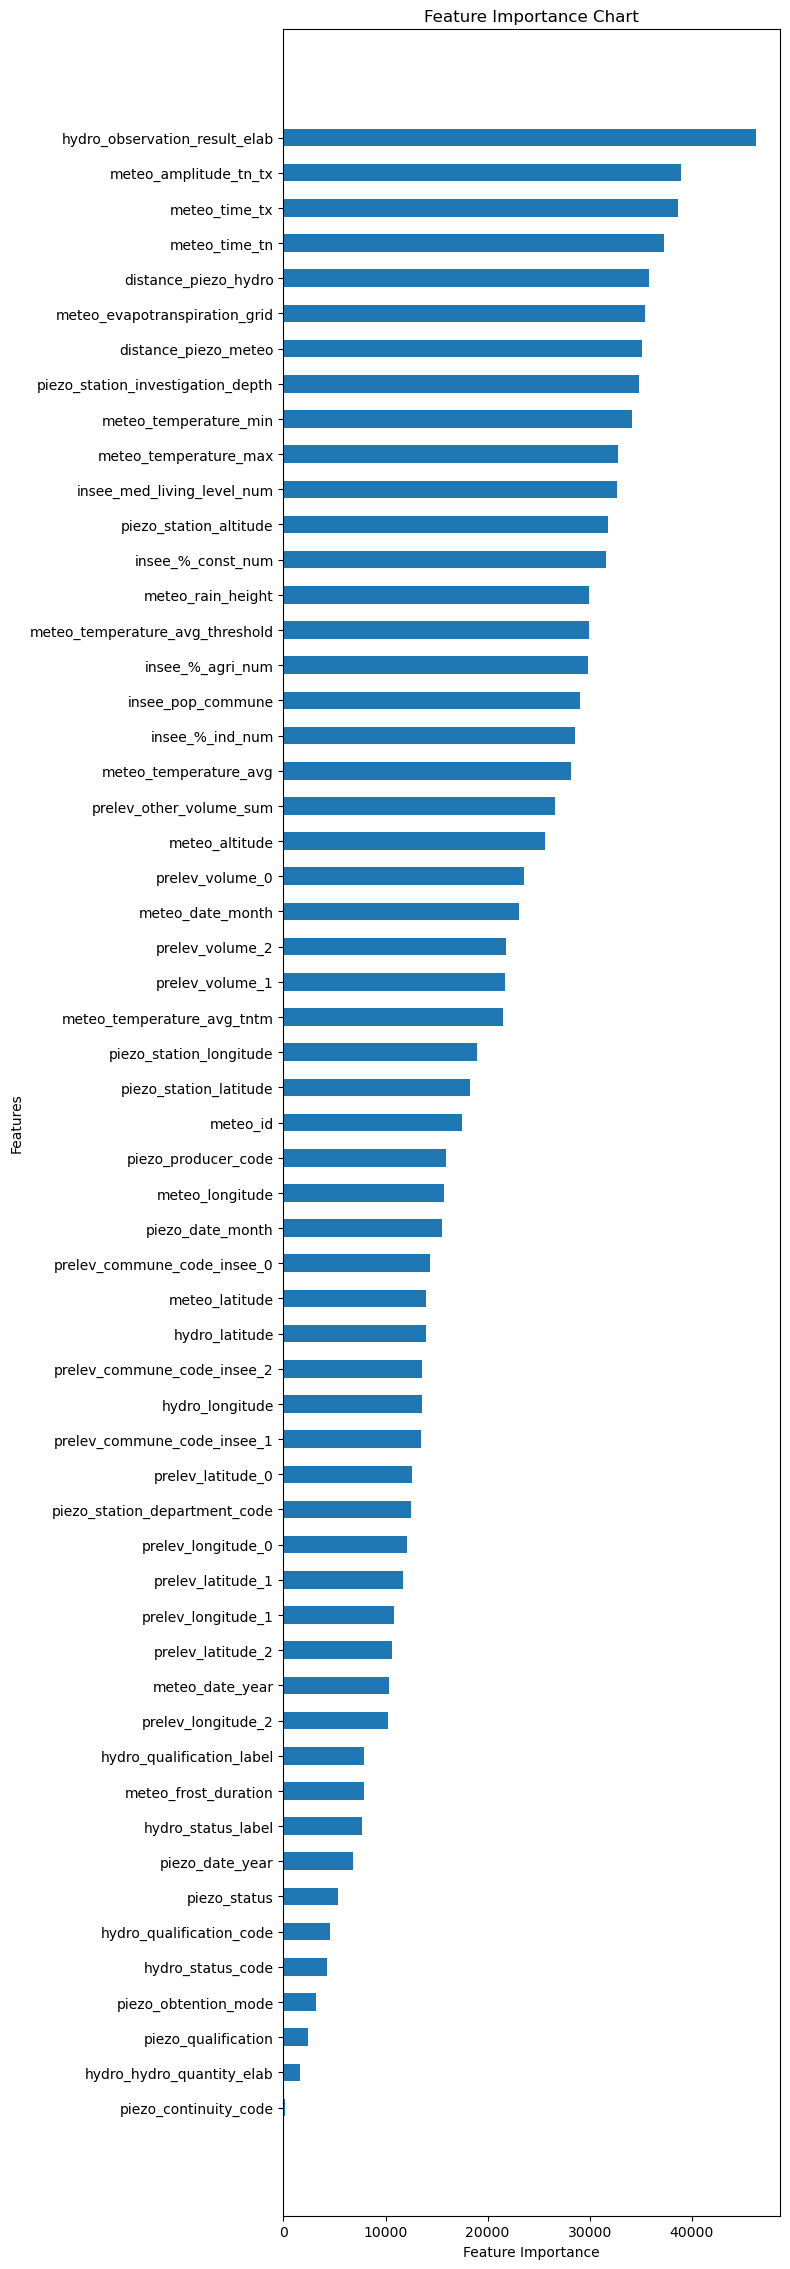

In [56]:
plt.figure(figsize=(8, len(automl.feature_names_in_) * 0.4))  # Adjust the figure size based on the number of features
plt.barh(feature_importance.iloc[:,0], feature_importance.iloc[:,1], height=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Chart')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [57]:
feature_importance.shape

(57, 2)